# EXERCISE
# Supervised Learning: Classification.

## *Binary electricity price classification in the Day-Ahead Spot Market*

**Objective:** Imagining that we are in the middle of 2020, predict in which hours the price of electricity in the Day-Ahead Market will be high, being **class 0** for values lower than 40 €, and **class 1** for values higher than 40 €.  We will use the context and historical data for **2020** of the target variable we want to classify and other features that can help to predict the model.

### Before you start:

* In the file **EJ2-data-prices.xlsx** is the input dataset for this example (attributes + label). 
* Data from January 2, 2020 to June 26, 2020.


## **Import libraries and data**


In [9]:
#pip install opencv-python

     |████████████████████████████████| 46.4 MB 8.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import cv2


2022-11-19 11:23:54.418253: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [57]:
def import_Pics (path):
    img = np.array(cv2.imread(path))
    return img

def normalize_RGB(matrix):
    #m = np.array(matrix)
    normize_func = lambda i: i / 255
    return matrix.vectorize(normize_func)
    


In [58]:
# Load the input dataset
### your code here

test_data = pd.read_csv ('train.csv')
test_data['example_path'] = test_data['example_path'].apply(import_Pics)

# Normalize data
test_data['example_path'] = test_data['example_path'].apply(normalize_RGB)

#test_data['example_path']
print('done')

AttributeError: 'numpy.ndarray' object has no attribute 'vectorize'

In [39]:
test_data.head()

,label,latitude,longitude,year,example_path
0,0,-2.051853,111.826093,2001,"[[[56, 59, 45], [51, 54, 40], [39, 42, 29], [3..."
1,2,-1.989349,105.309496,2013,"[[[10, 27, 18], [11, 27, 18], [1, 16, 11], [8,..."
2,0,1.223256,100.702217,2014,"[[[19, 33, 27], [13, 28, 24], [10, 26, 18], [1..."
3,0,-2.342948,103.890226,2008,"[[[13, 24, 16], [13, 23, 15], [16, 27, 19], [1..."
4,0,-0.126555,101.758175,2011,"[[[14, 31, 35], [13, 30, 32], [15, 32, 37], [2..."


## **2. Understanding the data**

It is necessary to visualize and understand the data we are going to work with, as well as to know its characteristics. 

1. How much data is there? How many attributes are there in the data?  
2. What do they mean?
3. Is there any missing data? 
4. Are the labels balanced? 
5. Statistical summary of the input data set.

1. **How much data is there? How many attributes are there in the data?**

In [40]:
# Data rows/columns
### your code here
test_data.shape

(1714, 5)

In [41]:
# Look at the first 5 rows of the data
### your code here
test_data.head()

,label,latitude,longitude,year,example_path
0,0,-2.051853,111.826093,2001,"[[[56, 59, 45], [51, 54, 40], [39, 42, 29], [3..."
1,2,-1.989349,105.309496,2013,"[[[10, 27, 18], [11, 27, 18], [1, 16, 11], [8,..."
2,0,1.223256,100.702217,2014,"[[[19, 33, 27], [13, 28, 24], [10, 26, 18], [1..."
3,0,-2.342948,103.890226,2008,"[[[13, 24, 16], [13, 23, 15], [16, 27, 19], [1..."
4,0,-0.126555,101.758175,2011,"[[[14, 31, 35], [13, 30, 32], [15, 32, 37], [2..."


**2. What do they mean?** 

***[Time, Day, Month]*** Time, day and month of each of the observations. They are integer values *int64*.

***[Hydro, Wind, Cyclocomb, Cogener, Nuclear, Coal, Biomass]*** refers to the hourly scheduled energy of the PVP program in the daily market by type of production of the previous day.  These are actual *float* values.

***[Demand]*** is the total scheduled energy in the daily electricity market in Spain on the previous day.  These are real *float* values.

***[price-elect-day-previous-day]*** price of electricity on the previous day. These are actual *float* values.

***[MIBGAS-previous-day]*** day-ahead natural gas price. These are actual *float* values.

***[Classes]*** are the price tags we want to predict.




In [42]:
# Data format
### your code here
test_data.dtypes


label             int64
latitude        float64
longitude       float64
year              int64
example_path     object
dtype: object

**3. Is any data missing? If so, please indicate how many and in which attribute**. 



In [43]:
### your code here
test_data.isna().sum()

label           0
latitude        0
longitude       0
year            0
example_path    0
dtype: int64

**4. ¿Are the targets balanced?** 

0    860
2    658
1    196
Name: label, dtype: int64


<AxesSubplot:ylabel='label'>

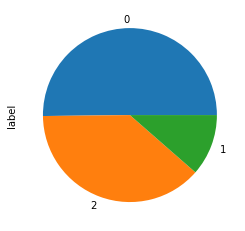

In [44]:
# Check if the labels are unbalanced
### your code here
balance_clases = test_data['label'].value_counts()

print(balance_clases)

# Class balance graph
balance_clases.plot.pie()


**5. Summary statistics of the input data set:** 

Descriptive statistics collects and analyzes the input data set with the objective of describing the characteristics and behaviors of this set through the following summary measures: total number of observations (count), mean (mean), standard deviation (std), minimum value (min), maximum value (max) and the values of the different quartiles (25%, 50%, 75%).


In [45]:
# Statistical data for each attribute
### your code here
test_data.describe()

,label,latitude,longitude,year
count,1714.000000,1714.000000,1714.000000,1714.000000
mean,0.882147,-0.458578,108.696539,2009.770712
std,0.933952,2.146293,9.136482,4.206081
min,0.000000,-8.318462,95.902427,2001.000000
25%,0.000000,-1.916629,101.627073,2007.000000
50%,0.000000,-0.417759,104.104074,2010.000000
75%,2.000000,1.062408,114.274851,2013.000000
max,2.000000,5.014370,140.900849,2016.000000


## **3. Visualize the data**.

A visual way to understand the input data. 
1. Histogram
2. Density curve
3. Boxplots
4. Correlation matrix


**1. Histogram**

Graphical representation of each of the attributes in the form of bars, where the surface of the bar is proportional to the frequency of the values represented.

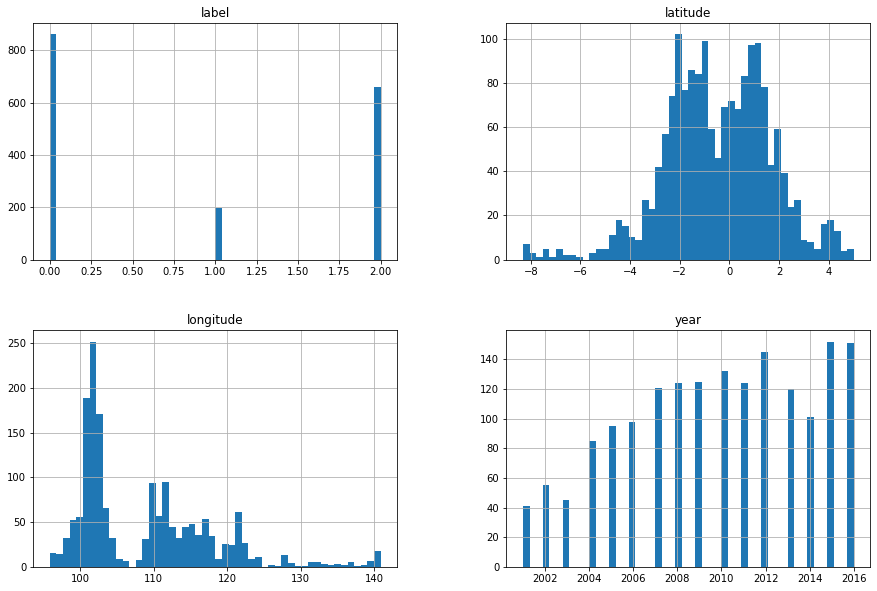

In [46]:
histogram = test_data.hist(xlabelsize=10, ylabelsize=10, bins=50, figsize=(15, 10))

**2. Density graph**.

Visualizes the distribution of the data. It is a variable of the histogram, but removes noise, so they are better for determining the distribution shape of an attribute. Density plot spikes help show where values are most concentrated. 

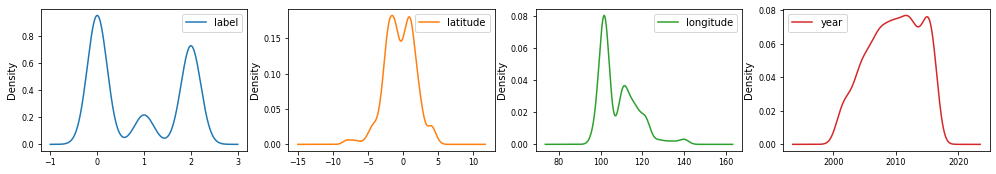

In [47]:
density = test_data.plot(kind='kde', x=4, subplots=True, legend=True, layout=(4, 4), figsize=(17, 12), sharex=False,
                        fontsize=8, stacked=True) 

**3. Boxplots** 

The boxplot allows us to identify outliers and compare distributions. In addition, we know how 50% of the values are distributed (within the box).

* Which attribute is striking because of its outliers? 

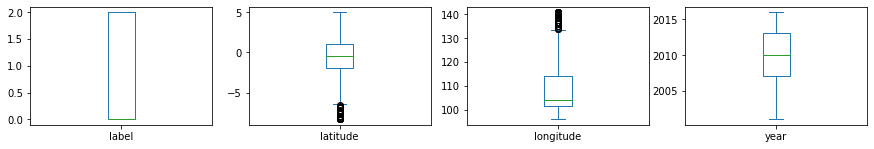

In [48]:
atributs_boxplot = test_data.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False,
                                 sharey=False, fontsize=10)

**4. Correlation matrix**. 
We use Spearman's method to evaluate the monotonic relationship between two continuous variables. 

Comparison between [Pearson y Spearman]

[Pearson y Spearman]: https://support.minitab.com/es-mx/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/correlation-and-covariance/a-comparison-of-the-pearson-and-spearman-correlation-methods/


* **Which variable has no correlation with any attribute?** 

In [50]:
#  Other data visualization library: seaborn
import seaborn as sns

# Calculation of correlation coefficients
### your code here
corr_matrix= test_data.corr(method='spearman')



/var/folders/hb/hsxv_19969b646bj1n59j_3w0000gn/T/ipykernel_32716/351873892.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


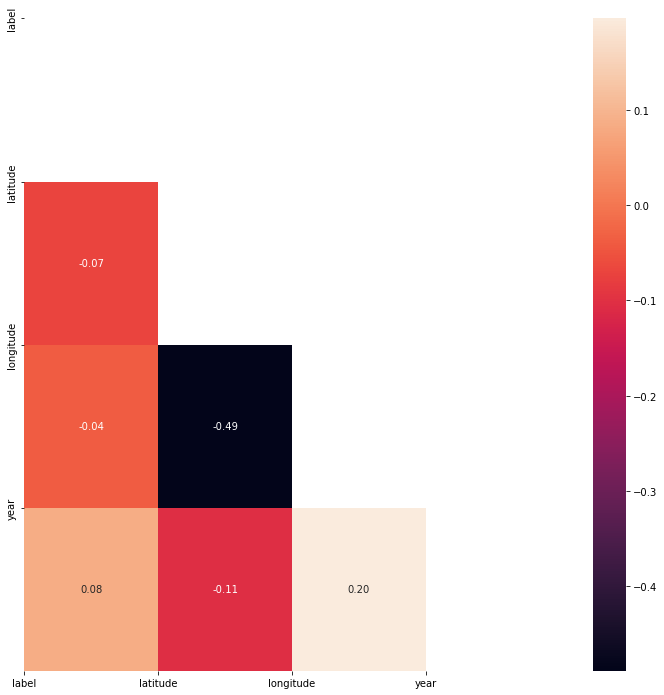

In [51]:

# Remove repeated values
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

  
f, ax = plt.subplots(figsize=(12, 12))

#Generate Heat Map,
sns.heatmap(corr_matrix, annot=True, fmt=".2f" , mask=mask,)
    # xticks
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns);
    # yticks
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    # plot
plt.show()
# Prices are missing as it is a object datatype

We cannot see the correlation with the price, we must pass it to numeric *LabelEncoder*.

In [13]:
from sklearn.preprocessing import LabelEncoder



lab_encoder = LabelEncoder() 
lab_encoder.fit(dataset['precio'])  
print(lab_encoder.classes_)  # Shows the different classes that exist

dataset['precio'] = lab_encoder.transform(dataset['precio'])
print(dataset)

['mayor que  40 euros' 'menor que  40 euros']
      hora  dia  mes  hidraul  eolica  demanda  ciclocomb  cogener  nuclear  \
0        0    2    1   5221.1  1639.0  13290.5     2500.5   2493.8   7093.6   
1        1    2    1   4928.5  1568.4  12720.1     2411.5   2447.8   7091.6   
2        2    2    1   4860.3  1566.3  12558.6     2307.5   2446.6   7092.6   
3        3    2    1   4980.8  1781.5  12837.5     2307.5   2436.7   7092.6   
4        4    2    1   4984.3  1998.2  13100.9     2374.2   2448.3   7094.6   
...    ...  ...  ...      ...     ...      ...        ...      ...      ...   
4218    19   26    6   4230.5  3680.1  29267.6     7090.4   3200.0   5061.4   
4219    20   26    6   4479.3  3828.2  29025.5     7130.7   3203.2   5063.4   
4220    21   26    6   3800.5  3712.7  29266.4     6764.1   3217.7   5062.4   
4221    22   26    6   3529.7  3780.1  28711.2     6745.1   3215.0   5064.4   
4222    23   26    6   2650.6  3676.9  26581.4     6650.9   3209.0   5065.4   

     

In [14]:
# replace column values 0 with 1 and 1 with 0
dataset['precio'] = dataset['precio'].map({1:0 ,0:1})
### your code here

In [15]:
# Show the first 10 rows of the dataset
dataset
### your code here


,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior,precio
0,0,2,1,5221.1,1639.0,13290.5,2500.5,2493.8,7093.6,430.0,270,41.88,11.27,0
1,1,2,1,4928.5,1568.4,12720.1,2411.5,2447.8,7091.6,430.0,243,38.60,11.27,0
2,2,2,1,4860.3,1566.3,12558.6,2307.5,2446.6,7092.6,417.0,362,36.55,11.27,0
3,3,2,1,4980.8,1781.5,12837.5,2307.5,2436.7,7092.6,387.0,369,32.32,11.27,0
4,4,2,1,4984.3,1998.2,13100.9,2374.2,2448.3,7094.6,387.0,413,30.85,11.27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,19,26,6,4230.5,3680.1,29267.6,7090.4,3200.0,5061.4,946.0,365,40.44,7.28,0
4219,20,26,6,4479.3,3828.2,29025.5,7130.7,3203.2,5063.4,946.0,453,41.23,7.28,1
4220,21,26,6,3800.5,3712.7,29266.4,6764.1,3217.7,5062.4,946.0,362,40.24,7.28,0
4221,22,26,6,3529.7,3780.1,28711.2,6745.1,3215.0,5064.4,946.0,424,40.10,7.28,1


#### We show again the correlation matrix with the value of the price [1 (very high), 0 (normal)]


/var/folders/hb/hsxv_19969b646bj1n59j_3w0000gn/T/ipykernel_81501/109467060.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


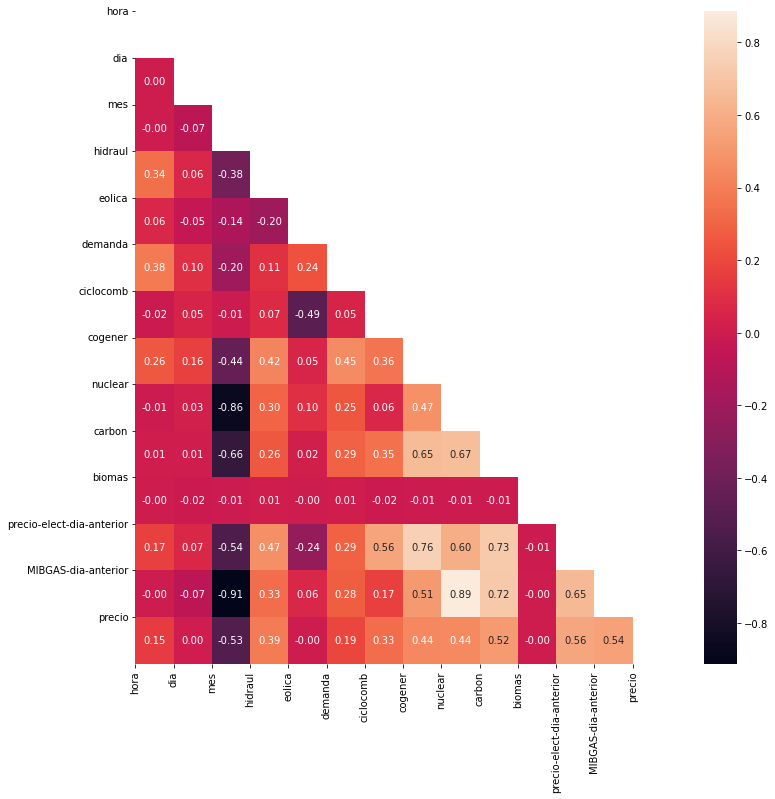

In [16]:
# Calculation of correlation coefficients

### your code here
corr_matrix= dataset.corr(method='spearman')

# Remove repeated values
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

  
f, ax = plt.subplots(figsize=(12, 12))
#Generate Heat Map,
sns.heatmap(corr_matrix, annot=True, fmt=".2f" , mask=mask,)
    # xticks
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns);
    # yticks
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    # plot
plt.show()

## *4. Prepare the data*.

1. Missing data
2. Data cleaning (remove outliers).
3. LabelEncoding (we have already done it).
4. Feature engineering
5. Transformation.

First, I divide the data into **attributes**: X (features) and **tags**: y (target).

In [17]:
# Atributes X (features); labels y (target)
### your code here
X = dataset.drop(['precio'], axis=1)
#X.drop['biomas']

y = dataset['precio']


**Missing data**

Check whether Nan exists in the input data.

- The following method is used [fillna] from Pandas.

- Learn more about how to allocate values with [Scikit Learn]

[Scikit Learn]: https://scikit-learn.org/stable/modules/impute.html
[fillna]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html





In [18]:
# Check for missing data in attributes
### your code here
X.isna().sum()

hora                         0
dia                          0
mes                          0
hidraul                      0
eolica                       0
demanda                      3
ciclocomb                    0
cogener                      0
nuclear                      0
carbon                       3
biomas                       0
precio-elect-dia-anterior    0
MIBGAS-dia-anterior          0
dtype: int64

In [19]:
# Fill the missing values of each attribute with the previous value of the attribute. 
### your code here
X['demanda'].fillna(method='ffill', inplace=True)
X['carbon'].fillna(method='ffill', inplace=True)

In [20]:
# Check for missing data in the target
### your code here
y.isna().sum()

0

In [21]:
# Check that no value is missing
X.isna().sum()
### your code here


hora                         0
dia                          0
mes                          0
hidraul                      0
eolica                       0
demanda                      0
ciclocomb                    0
cogener                      0
nuclear                      0
carbon                       0
biomas                       0
precio-elect-dia-anterior    0
MIBGAS-dia-anterior          0
dtype: int64

**3. Feature engineering**

Using the correlation matrix, eliminate the attributes with a correlation close to 0 with the **"price"** tag. 

**Which attribute(s) are eliminated?**

In [22]:
# Delete the attribute
### your code here
X.drop(['biomas', 'dia','eolica'], axis=1, inplace=True)

In [23]:
X

,hora,mes,hidraul,demanda,ciclocomb,cogener,nuclear,carbon,precio-elect-dia-anterior,MIBGAS-dia-anterior
0,0,1,5221.1,13290.5,2500.5,2493.8,7093.6,430.0,41.88,11.27
1,1,1,4928.5,12720.1,2411.5,2447.8,7091.6,430.0,38.60,11.27
2,2,1,4860.3,12558.6,2307.5,2446.6,7092.6,417.0,36.55,11.27
3,3,1,4980.8,12837.5,2307.5,2436.7,7092.6,387.0,32.32,11.27
4,4,1,4984.3,13100.9,2374.2,2448.3,7094.6,387.0,30.85,11.27
...,...,...,...,...,...,...,...,...,...,...
4218,19,6,4230.5,29267.6,7090.4,3200.0,5061.4,946.0,40.44,7.28
4219,20,6,4479.3,29025.5,7130.7,3203.2,5063.4,946.0,41.23,7.28
4220,21,6,3800.5,29266.4,6764.1,3217.7,5062.4,946.0,40.24,7.28
4221,22,6,3529.7,28711.2,6745.1,3215.0,5064.4,946.0,40.10,7.28


## *5. Split data*
 

In [24]:
from sklearn.model_selection import train_test_split

test_size = 0.2  # percentage of the input data that you will use to validate the model

### your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)



**4. Transformation (scaling, if neccesary)**. 

* **Scale the data using the *MinMaxScaler()* method within the range [0,1].**

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = X.copy()
X_scaled = pd.DataFrame(scaler.fit_transform(df_scaled))
X_scaled.columns = df_scaled.columns
X_scaled.head()

,hora,mes,hidraul,demanda,ciclocomb,cogener,nuclear,carbon,precio-elect-dia-anterior,MIBGAS-dia-anterior
0,0.000000,0.0,0.665797,0.374814,0.236761,0.357131,0.998130,0.208232,0.664823,0.688652
1,0.043478,0.0,0.621162,0.358728,0.226434,0.332550,0.997588,0.208232,0.611455,0.688652
2,0.086957,0.0,0.610758,0.354173,0.214367,0.331908,0.997859,0.201937,0.578100,0.688652
3,0.130435,0.0,0.629140,0.362039,0.214367,0.326618,0.997859,0.187409,0.509274,0.688652
4,0.173913,0.0,0.629674,0.369467,0.222106,0.332817,0.998401,0.187409,0.485356,0.688652


## *6.  Model building and evaluation*

* Select **[balanced_accuracy]** as evaluation metric. 
* Evaluation metrics available in [Scikit-Learn].


[Scikit-Learn]: https://scikit-learn.org/stable/modules/model_evaluation.html

[balanced_accuracy]: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

* Remember to always use the same random_state to be able to compare results. 

In [26]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

num_folds = 15
error_metrics = {'balanced_accuracy'}
models = { ('LR', LogisticRegression(solver='saga')), 
          
        ### your code here     
          ('KNN',KNeighborsClassifier()), ('RF', RandomForestClassifier()),
          ('XGB', xgb.XGBClassifier())
        }
results = [] # stores the results of the evaluation metrics
names = [] # name of each algorithm
msg = [] # print the summary of the cross-validation method


* Which one obtains better results? 
* Which balanced_accuracy do you get? 

Evaluation metrics:  balanced_accuracy
Model  KNN
Model  LR


/Users/bendiksherbold/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bendiksherbold/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bendiksherbold/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bendiksherbold/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bendiksherbold/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/User

Model  RF
Model  XGB
[('KNN', 0.7814382966602577, 0.03669434285173084), ('LR', 0.7600632343516343, 0.05348394279343949), ('RF', 0.8774395784376557, 0.034570952332396356), ('XGB', 0.8841062451043226, 0.033298901872182866)]


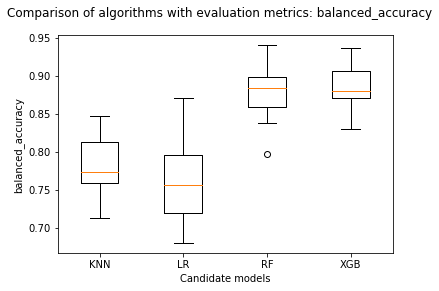

In [28]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Cross-validation training
for scoring in error_metrics:
    print('Evaluation metrics: ', scoring)
    for name, model in models:
        print('Model ', name)
        cross_validation = StratifiedKFold(n_splits=num_folds, random_state=0, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    print(msg)

    # Compare results between algorithms
    fig = plt.figure()
    fig.suptitle('Comparison of algorithms with evaluation metrics: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Candidate models')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

    results = []


## *7. Adjust hyperparameters*.

Steps to perform the hyperadjustment of the parameters:

* Metric to optimize
* Define search parameter ranges: *params*
* Train with validation data: *X_val

[XGBClassifier]:https://xgboost.readthedocs.io/en/latest/parameter.html

In [29]:
from sklearn.model_selection import TimeSeriesSplit
model =  xgb.XGBClassifier()    ### your code here
params = {
     'booster': ['gbtree', 'dart'], #default=gbtree
     'eta': [0.1, 0.3], #default=0.3
     # 'max_depth': [3, 6, 8],  #default=6
     #'predictor': ['auto', 'gpu_predictor'] # default auto
 }
scoring='balanced_accuracy'     ### your code here
cross_validation = TimeSeriesSplit(n_splits=10)      ### your code here
my_cv = cross_validation.split(X_val, y_val)
gsearch = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=my_cv, verbose=2)
gsearch.fit(X_val, y_val)

print("Best result: %f using the following hyperparameters %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END ............................booster=gbtree, eta=0.1; total time=   0.0s
[CV] END ............................booster=gbtree, eta=0.1; total time=   0.0s
[CV] END ............................booster=gbtree, eta=0.1; total time=   0.0s
[CV] END ............................booster=gbtree, eta=0.1; total time=   0.0s
[CV] END ............................booster=gbtree, eta=0.1; total time=   0.0s
[CV] END ............................booster=gbtree, eta=0.1; total time=   0.0s
[CV] END ............................booster=gbtree, eta=0.1; total time=   0.0s
[CV] END ............................booster=gbtree, eta=0.1; total time=   0.0s
[CV] END ............................booster=gbtree, eta=0.1; total time=   0.0s
[CV] END ............................booster=gbtree, eta=0.1; total time=   0.1s
[CV] END ............................booster=gbtree, eta=0.3; total time=   0.0s
[CV] END ............................booster=gbt

## *8.  Final evaluation of the model*



Evaluation metrics:
  * 1. Confusion matrix
  * 2. Matthews Coefficient

    
**Train the model with the optimal hyperparameters found in the previous section and make the predictions**. 

In [30]:
finalModel = xgb.XGBClassifier(booster= 'gbtree', eta=0.3)     ### your code here

finalModel.fit(X_train,y_train)  
y_predict = finalModel.predict(X_test)  


**1. Confusion matrix**

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_predict)### your code here


In [32]:
print(classification_report(y_test, y_predict))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       693
           1       0.85      0.86      0.85       152

    accuracy                           0.95       845
   macro avg       0.91      0.91      0.91       845
weighted avg       0.95      0.95      0.95       845

[[670  23]
 [ 22 130]]


/Users/bendiksherbold/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


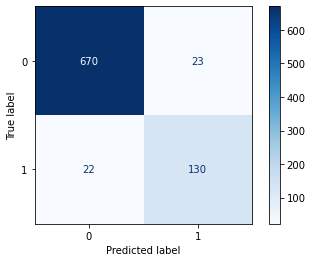

In [33]:
# Non-normalized graph of the martiz of confusion

disp = plot_confusion_matrix(finalModel, X_test, y_test,
                                 cmap=plt.cm.Blues, values_format = '')

**2. Matthews Coeficient (MCC)**

The MCC uses correlation coefficients between -1 and +1. 
* Coefficient +1 represents a perfect prediction.
* Coefficient 0 represents a random mean prediction.
* Coefficient -1 represents an inverse prediction. 

In [34]:
from sklearn.metrics import matthews_corrcoef

### your code here
matthews_corrcoef(y_test,y_predict)


0.8199750299749626